# Model Parameter Estimation

## About:
[TO_DO]

## Requirements:
**For module: **
- NumPy ``1.14.0``
- SciPy ``1.0.0``
- Biopython ``1.70``

**For notebook:**

In [75]:
import pandas as pd
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
from minilamp import map_tools

## Data checklist:

- Original ``.fastq`` positive control reads file
- Positive control mapped reads in ``.sam``

## Data load:

In [2]:
# positive control reads
reads_dir = '/Users/nquinones/Documents/projects/PQEI/Data/control_reads/'
control_d1 = reads_dir + 'run20150508_dengue_d1control_d1primer_2d.fastq'

# positive control maps
sam_c1_rf1 = '/Users/nquinones/Documents/projects/PQEI/Data/control_mapped/control_D1/conD1_refD1.sam'

## Use

### Read files

In [3]:
# read control reads
df_c1 = map_tools.fastq_len(control_d1)

# mapped reads
df_sam1 = map_tools.parse_sam(sam_c1_rf1)

df_sam1['I_p'] = df_sam1['I']/df_sam1['len']
df_sam1['D_p'] = df_sam1['D']/df_sam1['len']
df_sam1['M_p'] = df_sam1['M']/df_sam1['len']
df_sam1['H_p'] = df_sam1['H']/df_sam1['len']
df_sam1['H_p'] = df_sam1['H']/df_sam1['len']

    sam_c2_rf2 = '/Users/nquinones/Documents/projects/PQEI/Data/control_mapped/control_D2/conD2_refD2.sam'
    sam_c3_rf3 = '/Users/nquinones/Documents/projects/PQEI/Data/control_mapped/control_D3/conD3_refD3.sam'
    sam_c4_rf4 = '/Users/nquinones/Documents/projects/PQEI/Data/control_mapped/control_D4/conD4_refD4.sam'

    control_d2 = reads_dir + 'run20150422_dengue_d2control_d2primer_2d.fastq'
    control_d3 = reads_dir + 'run20150422_dengue_d3control_d3primer_2d.fastq'
    control_d4 = reads_dir + 'run20150424_dengue_d4control_d4primer_2d.fastq'

    df_c2 = map_tools.fastq_len(control_d2)
    df_c3 = map_tools.fastq_len(control_d3)
    df_c4 = map_tools.fastq_len(control_d4)
    df_call = pd.concat([df_c1, df_c2, df_c3, df_c4])
    df_call = df_call.sort_values(by='len', ascending=False)

    df_sam2 = map_tools.parse_sam(sam_c2_rf2)
    df_sam3 = map_tools.parse_sam(sam_c3_rf3)
    df_sam4 = map_tools.parse_sam(sam_c4_rf4)
    df_samall = pd.concat([df_sam1, df_sam2, df_sam3, df_sam4])

### Fit: **Read lengths** for DENV1

In [4]:
# fit length to lognorm
data_len = sorted(df_c1['len'].tolist())
len_fit = stats.lognorm.fit(data_len, loc=0)

In [5]:
# evaluate fit
x_len, y_len = data_len, stats.lognorm.pdf(data_len,
                                           len_fit[0],
                                           len_fit[1],
                                           len_fit[2])

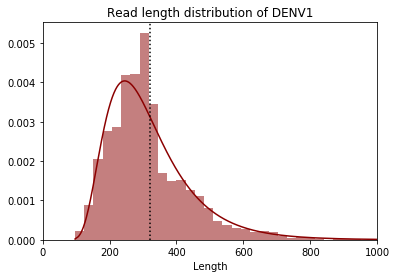

Mean: 320.7155172413793
Fit: (0.4664305259426143, 55.30095810811527, 236.19897227963213)


In [6]:
# PLOT
# data
plt.hist(df_c1['len'],
         bins=200,
         normed=True,
         color='darkred',
         alpha=0.5)

# fit
plt.plot(x_len, y_len,
         color='darkred')

# mean
plt.axvline(df_c1['len'].mean(),
            color='black',
            linestyle=':')

plt.title('Read length distribution of DENV1')
plt.xlabel('Length')
plt.xlim(0,1000)
plt.show()

print('Mean: {}'.format(df_c1['len'].mean()))
print('Fit: {}'.format(len_fit))

### Fit: **Substitution rates** for DENV1

In [8]:
# fit
data_sub = df_sam1['M_p'].sort_values().tolist()
sub_fit = stats.norm.fit(data_sub)

In [12]:
# evaluate fit
sub_range_line = np.linspace(-.05, 0.35, num=100)
x_sub, y_sub = sub_range_line, stats.norm.pdf(sub_range_line,
                                              sub_fit[0],
                                              sub_fit[1])   

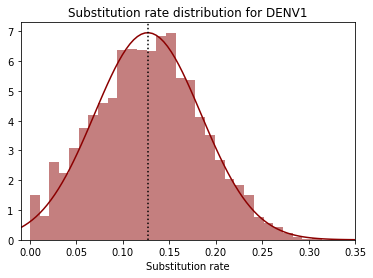

Mean: 0.1267781623443151
Fit: (0.12677816234431524, 0.057351408270096174)


In [13]:
# PLOT
# data
plt.hist(df_sam1['M_p'],
         bins=30,
         normed=True,
         color='darkred',
         alpha=0.5)

# fit
plt.plot(x_sub, y_sub,
         color='darkred')

# mean
plt.axvline(x=df_sam1['M_p'].mean(),
            color='black',
            linestyle=':')

plt.title('Substitution rate distribution for DENV1')
plt.xlabel('Substitution rate')
plt.xlim(-0.01,0.35)
plt.show()

print('Mean: {}'.format(df_sam1['M_p'].mean()))
print('Fit: {}'.format(sub_fit))

### Fit: **Insertion rates** for DENV1

In [16]:
# fit
data_ins = df_sam1['I_p'].sort_values().tolist()

# exponential
ins_fit = stats.expon.fit(data_ins)

In [20]:
# evaluate fit
x_ins, y_ins = data_ins, stats.expon.pdf(data_ins,
                                         ins_fit[0],
                                         ins_fit[1])   

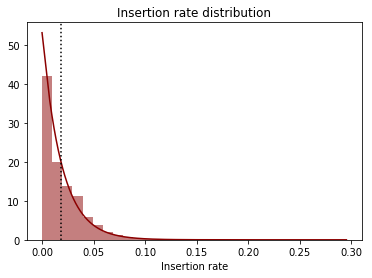

Mean: 0.01884094892847475
Fit: (-5.20817923806713e-10, 0.018831624770891245)


In [19]:
# PLOT
# data
plt.hist(df_sam1['I_p'],
         bins=30,
         normed=True,
         color='darkred',
         alpha=0.5)

# fit
plt.plot(x_ins, y_ins,
         color='darkred')

# mean
plt.axvline(x=df_sam1['I_p'].mean(),
            color='black',
            linestyle=':')

plt.title('Insertion rate distribution')
plt.xlabel('Insertion rate')
plt.show()

print('Mean: {}'.format(df_sam1['I_p'].mean()))
print('Fit: {}'.format(ins_fit))

### Fit: **Deletion rates** for DENV1

In [57]:
# fit
data_del = df_sam1['D_p'].sort_values().tolist()
del_fit = stats.norm.fit(data_sub)

In [67]:
# cheat
del_fit = (0.10, 0.057)

In [68]:
# evaluate fit
x_del, y_del = data_del, stats.norm.pdf(data_del,
                                         del_fit[0],
                                         del_fit[1]) 


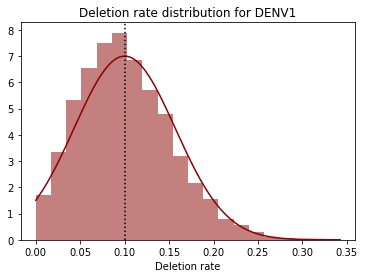

Mean: 0.10054131774519066
Fit: (0.1, 0.057)


In [69]:
# PLOT
# data
plt.hist(df_sam1['D_p'],
         bins=20,
         normed=True,
         color='darkred',
         alpha=0.5)

# fit
plt.plot(x_del, y_del, color='darkred')

# mean
plt.axvline(x=df_sam1['D_p'].mean(),
            color='black',
            linestyle=':')

plt.title('Deletion rate distribution for DENV1')
plt.xlabel('Deletion rate')
plt.show()

print('Mean: {}'.format(df_sam1['D_p'].mean()))
print('Fit: {}'.format(del_fit))

## Model definitions

In [70]:
model_c1_v1 = {'len_fit': (0.4664305259426143, 55.30095810811527, 236.19897227963213),
               'sub_fit': 0.1267781623443151,
               'ins_fit': 0.01884094892847475,
               'del_fit': 0.10054131774519066}

In [72]:
model_c1_v2 = {'len_fit': (0.4664305259426143, 55.30095810811527, 236.19897227963213),
               'sub_fit': (0.12677816234431524, 0.057351408270096174),
               'ins_fit': (-5.20817923806713e-10, 0.018831624770891245),
               'del_fit': (0.1, 0.057)}